In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 



In [5]:
data = pd.read_csv("lung_cancer_encoded.csv")

In [6]:
data 

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [10]:
data.columns

Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [11]:
data.sum()

GENDER                   162
SMOKING                  174
YELLOW_FINGERS           176
ANXIETY                  154
PEER_PRESSURE            155
CHRONIC DISEASE          156
FATIGUE                  208
ALLERGY                  172
WHEEZING                 172
ALCOHOL CONSUMING        172
COUGHING                 179
SHORTNESS OF BREATH      198
SWALLOWING DIFFICULTY    145
CHEST PAIN               172
LUNG_CANCER              270
dtype: int64

In [15]:
x = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

In [16]:
x

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0]], shape=(309, 14))

In [17]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [39]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [55]:
class Model(nn.Module):
    def __init__(self, features = 14, h1 = 9, h2 = 9, classes = 2):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, classes)
    def forward(self , x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x 

In [56]:
torch.manual_seed(42)
model = Model()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 



In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
x_train_scaled 

array([[ 0.93338744,  0.87423436, -1.08896313, ...,  0.71787006,
        -0.86704847,  0.91830473],
       [ 0.93338744, -1.14385804, -1.08896313, ...,  0.71787006,
        -0.86704847,  0.91830473],
       [ 0.93338744, -1.14385804,  0.91830473, ...,  0.71787006,
        -0.86704847, -1.08896313],
       ...,
       [-1.07136646,  0.87423436,  0.91830473, ...,  0.71787006,
         1.15333806, -1.08896313],
       [-1.07136646,  0.87423436, -1.08896313, ...,  0.71787006,
        -0.86704847, -1.08896313],
       [ 0.93338744,  0.87423436, -1.08896313, ...,  0.71787006,
        -0.86704847,  0.91830473]], shape=(247, 14))

In [60]:
x_train = torch.FloatTensor(x_train_scaled)
x_test = torch.FloatTensor(x_test_scaled)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [61]:
x_train

tensor([[ 0.9334,  0.8742, -1.0890,  ...,  0.7179, -0.8670,  0.9183],
        [ 0.9334, -1.1439, -1.0890,  ...,  0.7179, -0.8670,  0.9183],
        [ 0.9334, -1.1439,  0.9183,  ...,  0.7179, -0.8670, -1.0890],
        ...,
        [-1.0714,  0.8742,  0.9183,  ...,  0.7179,  1.1533, -1.0890],
        [-1.0714,  0.8742, -1.0890,  ...,  0.7179, -0.8670, -1.0890],
        [ 0.9334,  0.8742, -1.0890,  ...,  0.7179, -0.8670,  0.9183]])

In [62]:
y_train 

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1])

In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [66]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    predicted = torch.argmax(y_pred, dim=1)
    train_acc = (predicted == y_train).float().mean()

    
    if i % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_pred = model(x_test)
            test_acc = (torch.argmax(test_pred, dim=1) == y_test).float().mean()
        model.train()

        print(f"Epoch {i} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 | Loss: 0.0735 | Train Acc: 0.9595 | Test Acc: 0.9194
Epoch 10 | Loss: 0.0675 | Train Acc: 0.9676 | Test Acc: 0.9194
Epoch 20 | Loss: 0.0643 | Train Acc: 0.9676 | Test Acc: 0.9194
Epoch 30 | Loss: 0.0623 | Train Acc: 0.9676 | Test Acc: 0.9194
Epoch 40 | Loss: 0.0614 | Train Acc: 0.9676 | Test Acc: 0.9194
Epoch 50 | Loss: 0.0608 | Train Acc: 0.9676 | Test Acc: 0.9194
Epoch 60 | Loss: 0.0603 | Train Acc: 0.9676 | Test Acc: 0.9194
Epoch 70 | Loss: 0.0595 | Train Acc: 0.9676 | Test Acc: 0.9194
Epoch 80 | Loss: 0.0592 | Train Acc: 0.9676 | Test Acc: 0.9355
Epoch 90 | Loss: 0.0590 | Train Acc: 0.9676 | Test Acc: 0.9355


Text(0.5, 1.0, 'Training loss Curve')

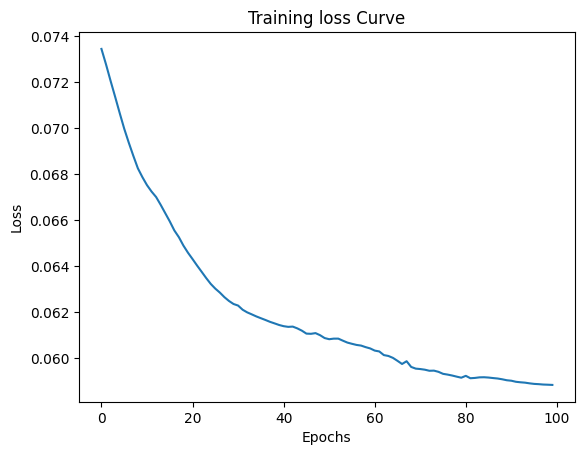

In [67]:
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss Curve")
